# Atividade05 - <font color='red'>Solução</font> - Visualização de Dados em Python

**Conteúdo**
- Gráficos - Tipos de Visualizações
- Pandas - Visualização de dados
- Seaborn - Dados Estatísticos
- Bokeh - Mapas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
#configuração para mostrar gráficos sem chamar a função show()
%matplotlib inline
#configuração do notebook para acesso local aos datasets
path = '/content/drive/MyDrive/2022_2_extensao_adp/datasets/'

In [ ]:
# Importacao das bibliotecas e configuracoes gerais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn aesthetic parameters to defaults
sns.set()
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(10, 7)})

### Dataset de indicadores


In [ ]:
referencias = ['ago', 'set', 'out', 'nov', 'dez', 'jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul']
cdi = [0.43, 0.44, 0.49, 0.59, 0.77, 0.73, 0.76, 0.93, 0.83, 1.03, 1.02, 1.03]
ipca = [0.87, 1.16, 1.25, 0.95, 0.73, 0.54, 1.01, 1.62, 1.06, 0.47, 0.67, -0.68]
igpm = [0.66, -0.64, 0.64, 0.02, 0.87, 1.82, 1.83, 1.74, 1.41, 0.52, 0.59, 0.21]
ibov = [ -2.48, -6.57, -6.74, -1.5, 2.85, 6.98, 0.89, 6.06, -10.10, 3.22, -11.50, 4.69]

df_indicadores = pd.DataFrame(data={'IPCA': ipca, 'CDI': cdi, 'IGPM': igpm, 
                                    'IBOV' : ibov}, index=referencias)
df_indicadores

,IPCA,CDI,IGPM,IBOV
ago,0.87,0.43,0.66,-2.48
set,1.16,0.44,-0.64,-6.57
out,1.25,0.49,0.64,-6.74
nov,0.95,0.59,0.02,-1.50
dez,0.73,0.77,0.87,2.85
jan,0.54,0.73,1.82,6.98
fev,1.01,0.76,1.83,0.89
mar,1.62,0.93,1.74,6.06
abr,1.06,0.83,1.41,-10.10
mai,0.47,1.03,0.52,3.22


#### **Exercício 1**

Mostrar 3 gráficos, em uma apresentação de 1 linha e 3 colunas, considerando os últimos seis meses da série, dos seguintes indicadores:
- gráfico 1: IBOV e CDI
- gráfico 2: IBOV e IPCA
- gráfico 3: IBOV e IGPM

Use a mesma cor e pontos para IBOV, mas varie a cor dos demais.

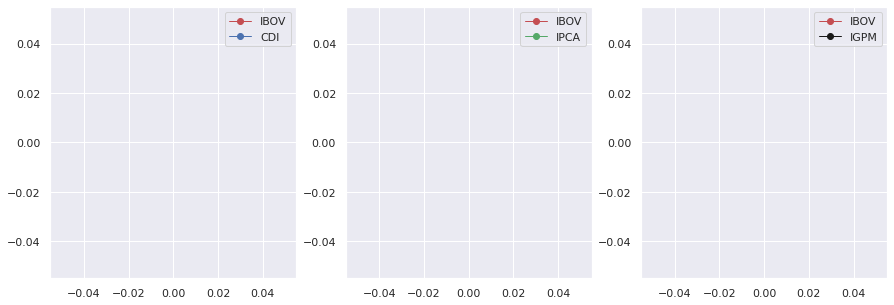

In [ ]:
#solucao
fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
ax1.plot(df_indicadores.loc['mai':'out','IBOV'], 'ro-', label='IBOV', linewidth=1)
ax1.plot(df_indicadores.loc['mai':'out','CDI'], 'bo-', label='CDI', linewidth=1)
ax1.legend(loc='best')
ax2.plot(df_indicadores.loc['mai':'out','IBOV'], 'ro-', label='IBOV', linewidth=1)
ax2.plot(df_indicadores.loc['mai':'out','IPCA'], 'go-', label='IPCA', linewidth=1)
ax2.legend(loc='best')
ax3.plot(df_indicadores.loc['mai':'out','IBOV'], 'ro-', label='IBOV', linewidth=1)
ax3.plot(df_indicadores.loc['mai':'out','IGPM'], 'ko-', label='IGPM', linewidth=1)
ax3.legend(loc='best')
plt.show()

### Dataset da Bolsa Eletrônica de Compras

In [ ]:
# carregamento do dataset da BEC e geração de informações de quantidade negociada
df_bec = pd.read_excel(path+'03-DS_BEC.xlsx')
df_bec = df_bec[['Cód Desc Órgão', 'Mês Ano Encerramento', 'Cod Desc Fornecedor', 
                 'Descrição Procedimento Compra', 'Cod Desc Item', 
                 'Quantidade de Item','Valor Unitário Negociado', 
                 'Valor Total Negociado em R$']]
df_bec['Quantidade Negociada'] = df_bec['Valor Total Negociado em R$'] / df_bec[
    'Valor Unitário Negociado']  
df_bec.head(4)

,Cód Desc Órgão,Mês Ano Encerramento,Cod Desc Fornecedor,Descrição Procedimento Compra,Cod Desc Item,Quantidade de Item,Valor Unitário Negociado,Valor Total Negociado em R$,Quantidade Negociada
0,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,28363983000140 - OFICIAL WEB COMERCIAL LTDA - ME,DISPENSA DE LICITAÇÃO,"4843274 - FILME PROTETIVO, DE POLIESTER, 1,00X...",1,168.3,673.2,4.0
1,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,12517378000146 - A. C. DOS SANTOS MÓVEIS ME,DISPENSA DE LICITAÇÃO,"4863801 - ESTANTE DESMONTAVEL DE ACO,ABERTA,06...",1,235.0,1880.0,8.0
2,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,17365274000187 - CBF COMÉRCIO DE CONFECÇÕES BA...,DISPENSA DE LICITAÇÃO,"4628020 - BANDEIRA,MUNICIPIO DE SAO PAULO, MED...",1,170.0,340.0,2.0
3,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,23183671000130 - GALEQ COMÉRCIO INTERNACIONAL ...,DISPENSA DE LICITAÇÃO,"5133017 - NO-BREAK, 600 VA",1,27.6,1104.0,40.0


#### Exercício 2

Apresentar o boxplot do Valor Unitário Negociado referente ao item '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO'


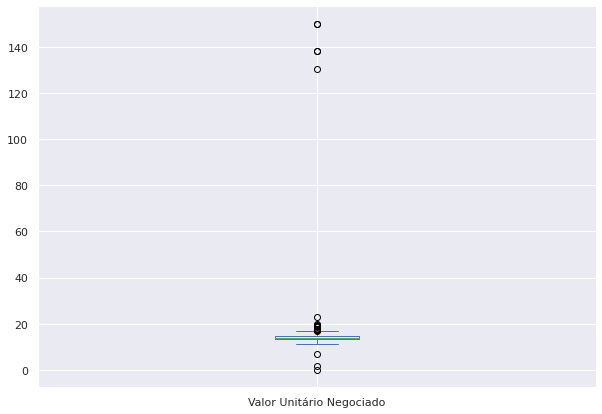

In [ ]:
# solução
#
(
    df_bec.loc[df_bec['Cod Desc Item'] == 
               '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO', 
               ['Valor Unitário Negociado']]
).plot.box()

In [ ]:
def bigodes(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    _max = dataset.max()
    _min = dataset.min()
    iqr = q3-q1
    q_max = q3 + iqr*1.5
    q_min = q1 - iqr*1.5
    q_max = q_max if _max > q_max else _max
    q_min = q_min if _min < q_min else _min
    return(q_min, q_max)

In [ ]:
lims = bigodes(df_bec.loc[df_bec['Cod Desc Item'] == '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO',
'Valor Unitário Negociado'])
print(lims)

(11.11125, 17.00125)


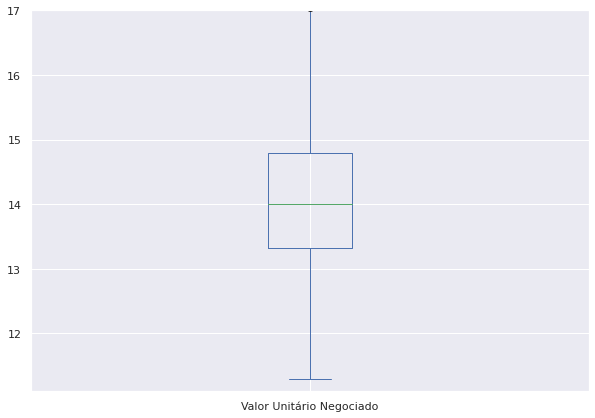

In [ ]:

df_bec.loc[df_bec['Cod Desc Item'] == '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO',
'Valor Unitário Negociado'].plot.box(ylim=lims)

#### Exercício 3

Apresentar o histograma do Valor Unitário Negociado referente ao item '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f17b8d450>]],
      dtype=object)

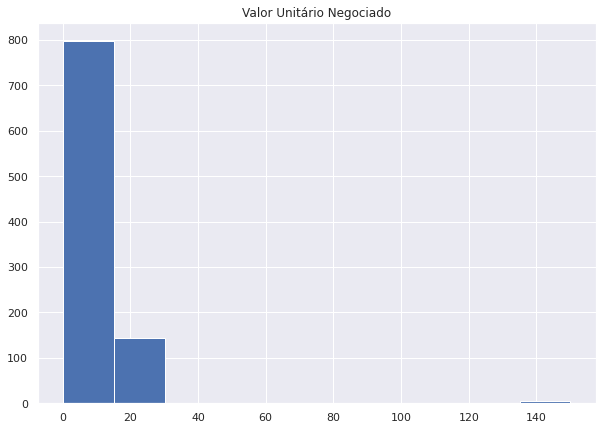

In [ ]:
# solução
#
(
    df_bec.loc[df_bec['Cod Desc Item'] == 
        '2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO', 
               ['Valor Unitário Negociado']]
).hist()

### Uma visão da compra de papel sulfite


A dataset sulfite é uma visão do dataset da BEC que inclui apenas compras de PAPEL SULFITE A4 BRANCO. Veja que a função lambda abaixo se encarrega desta seleção. Como resultado temos 6 tipos diferentes de itens. 

In [ ]:
sulfite = df_bec[list(map(lambda x: x.find('PAPEL SULFITE') >=0 
                          and x.find('A4') >=0 
                          and x.find('BRANCO') >=0
                          and x.find('MILIMETRADO') == -1
                          , df_bec['Cod Desc Item']))]
sulfite.groupby('Cod Desc Item')['Cod Desc Item'].count()

Cod Desc Item
2421798 - PAPEL SULFITE DE PAPELARIA,120G/M2,A4,BRANCO,EMBALAGEM BOPP                17
2903881 - PAPEL SULFITE DE PAPELARIA,FORMATO A4,(210X297)MM,75G,BRANCO              946
3013618 - PAPEL SULFITE DE PAPELARIA,75G/M2,A4,BRANCO,CANA DE ACUCAR,EMB.BOPP        65
4381076 - PAPEL SULFITE DE PAPELARIA 180G/M2,A4,BRANCO,C/CERTIF.FSC OU CERFLOR       10
4646444 - PAPEL SULFITE DE PAPELARIA,75G/M2,A4,BRANCO,CORTE ROTATIVO,FSC/CERFLOR      6
Name: Cod Desc Item, dtype: int64

#### Exercício 4

Usando o sns.barplot crie um gráfico de barras que mostre o valor total negociado por cada um dos 5 tipos de papel sulfite branco a4 não milimetrado. Use a melhor disposição para mostrar os dados (horizontal ou vertical).

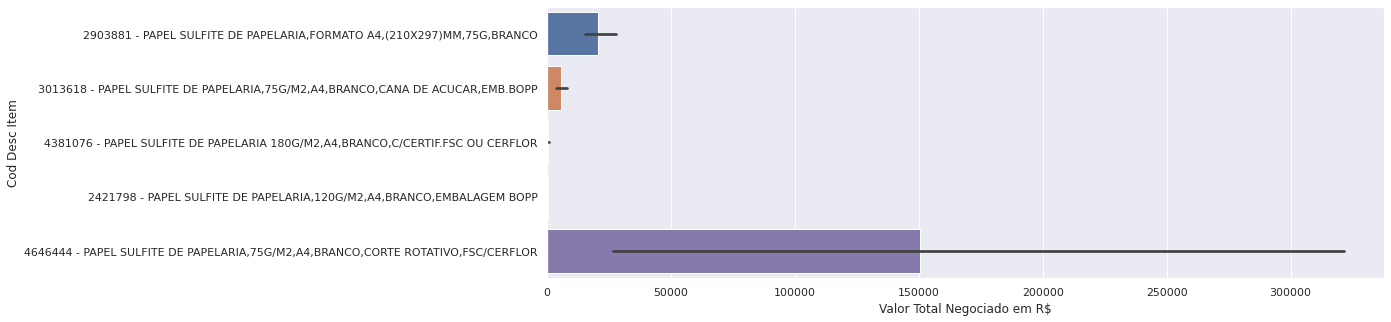

In [ ]:
# solução
#
fig=plt.figure(figsize=(15, 5))
sns.barplot(y='Cod Desc Item',x='Valor Total Negociado em R$',data=sulfite)

#### Exercício 5

Crie 5 histogramas/kde (use sns.distplot), um para cada item, dos valores unitários negociados. Use para isso subplots e apresente o resultado em uma figura com 3 linhas e duas colunas. Coloque os títulos apropriados nos gráficos e use 5 cores diferentes, uma para cada um. 

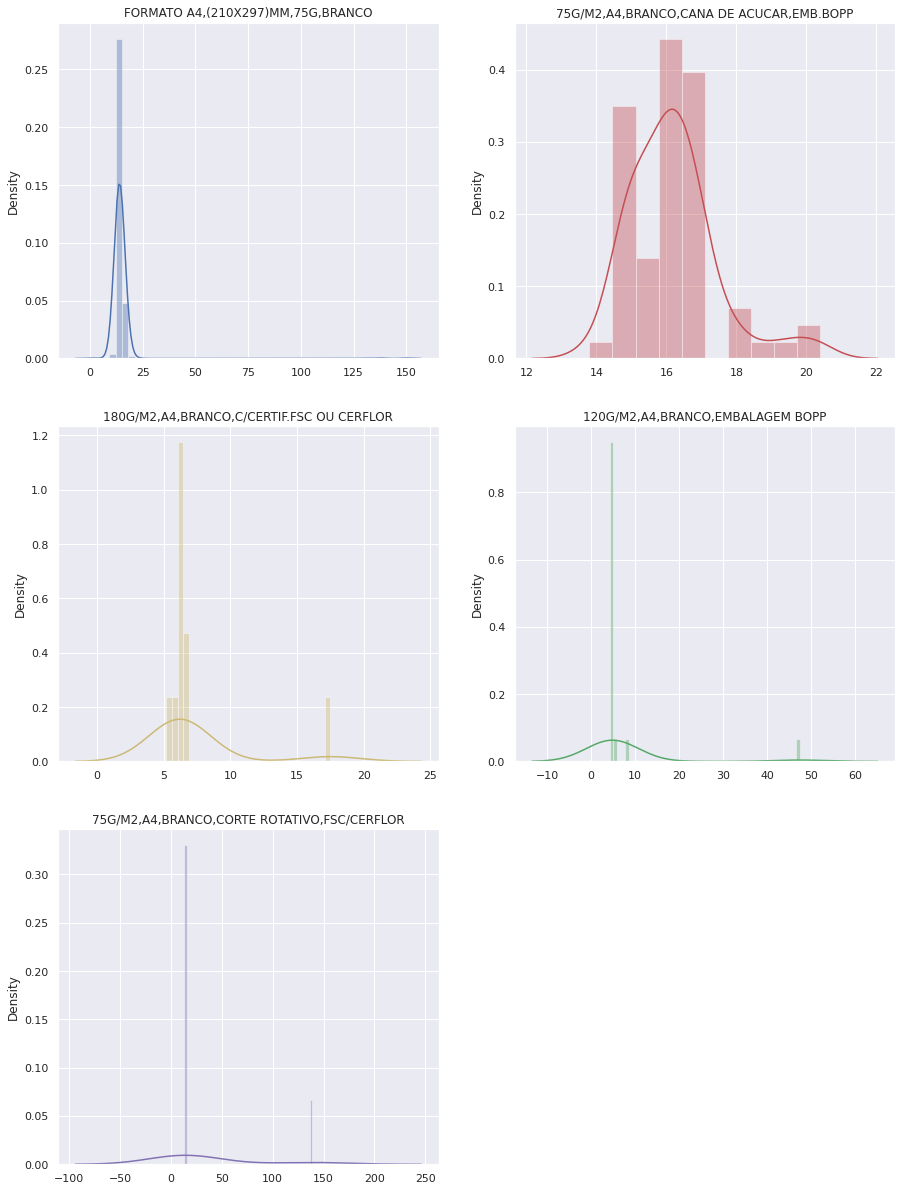

In [ ]:
# solução
#
fig=plt.figure(figsize=(15, 21))
pos = [321,322,323,324,325]
cores = ['b','r','y','g','m']
for item,n,cor in zip(sulfite['Cod Desc Item'].unique(),pos,cores):
    ax = plt.subplot(n)
    sns.distplot(df_bec.loc[df_bec['Cod Desc Item'] == item, ['Valor Unitário Negociado']],color=cor)
    plt.title(item[37:])
#plt.show()

### Dataset de diferentes ações da bolsa

In [ ]:
df_acoes = pd.read_csv(path+'04-DS_ACOES.csv', sep=';', 
                       parse_dates=['Date'])
df_acoes.set_index('Date', inplace=True)
df_acoes.head(5)

,VALE3.SA,LREN3.SA,CMIG3.SA,OIBR4.SA,BBDC3.SA,ITSA4.SA,USIM5.SA,BRML3.SA,PETR3.SA,VIVT4.SA,ENBR3.SA,RADL3.SA
Date,,,,,,,,,,,,
2018-01-02,41.720001,NaN,6.60,3.42,24.454500,10.0273,9.60,12.40,17.330000,49.009998,14.20,90.449997
2018-01-03,41.470001,NaN,6.61,3.42,24.545500,10.1454,9.92,12.36,17.549999,48.419998,13.56,88.209999
2018-01-04,41.639999,NaN,6.55,3.42,24.992399,10.3364,10.48,12.51,17.700001,49.400002,13.58,88.889999
2018-01-05,42.290001,NaN,6.55,3.44,25.000000,10.3546,10.03,12.55,17.840000,49.630001,13.46,90.449997
2018-01-08,43.230000,NaN,6.50,3.43,25.000000,10.3455,10.14,12.50,18.120001,50.009998,13.68,89.300003


#### Exercício 6

Apresentar a disstribuição de Valores unitários negociados para o item '4428692 - ACUCAR REFINADO'

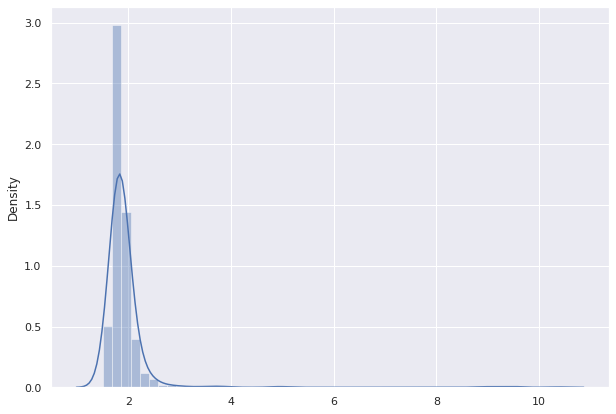

In [ ]:
# solução
#
df_acucar = df_bec[df_bec['Cod Desc Item'] == '4428692 - ACUCAR REFINADO']
data = df_acucar[['Valor Unitário Negociado']]
ax = sns.distplot(data)

#### Exercício 7

Apresentação do Valor Unitário Negociado em Função da Quantidade Negociada incluído a reta de regrassão para item '4428692 - ACUCAR REFINADO'. Opcional - Remover outliers dos valores unitários negociados

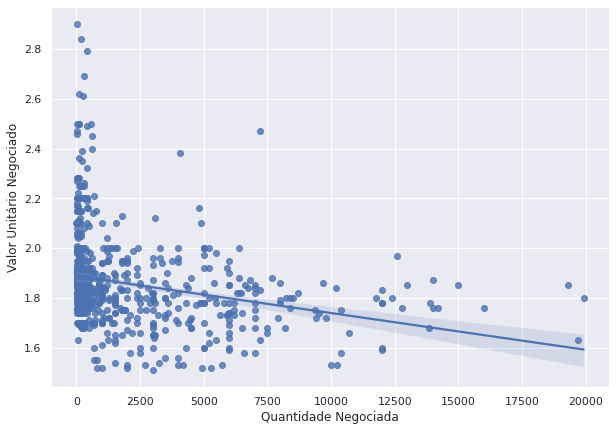

In [ ]:
# solução
#
df_acucar = df_bec[df_bec['Cod Desc Item'] == '4428692 - ACUCAR REFINADO']
data = df_acucar[['Quantidade Negociada', 'Valor Unitário Negociado']]
data = data[(data['Quantidade Negociada'] < 20000) & 
            (data['Valor Unitário Negociado'] < 3)]
ax = sns.regplot(x='Quantidade Negociada', y='Valor Unitário Negociado', data=data)

### Dataset de ocorrências criminais em SP

In [ ]:
df_crime = pd.read_excel(path+'05-DS_CRIME_SP.xlsx', parse_dates=['DATA_OCORRENCIA_BO'])
df_crime = df_crime[['RUBRICA', 'NOME_DELEGACIA', 'DATA_OCORRENCIA_BO', 
                     'HORA_OCORRENCIA_BO','DESCR_TIPOLOCAL', 'LOGRADOURO', 
                     'NUMERO_LOGRADOURO','SEXO_PESSOA', 
                     'IDADE_PESSOA','x', 'y']]
df_crime.head(4)

,RUBRICA,NOME_DELEGACIA,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,DESCR_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,SEXO_PESSOA,IDADE_PESSOA,x,y
0,Roubo (art. 157),40º D.P. VILA STA MARIA,2015-05-21,21:00:00,Via pública,RUA DOMICIANO RIBEIRO,968.0,M,54,-5.195591e+05,-2.690467e+06
1,Roubo (art. 157),75º D.P. JARDIM ARPOADOR,2015-06-24,06:40:00,Via pública,RUA FREI VITAL DE FRESCAROLO,30.0,M,16,-5.208704e+06,-2.704744e+06
2,Roubo (art. 157),91º D.P. CEASA,2015-10-28,20:15:00,Via pública,RUA ALIANCA LIBERAL,286.0,M,56,-5.201337e+06,-2.695291e+06
3,Roubo (art. 157),DEIC - 3ª DELEGACIA DA DIVECAR,2015-06-11,09:00:00,Via pública,RUA ANTONIO CRESPO,33.0,M,31,-5.169712e+06,-2.622279e+05


In [ ]:
df_crime['RUBRICA'].value_counts()

Roubo (art. 157)                                                          81766
Furto (art. 155)                                                          56104
Lesão corporal (art. 129)                                                 12865
Furto qualificado (art. 155, §4o.)                                        11989
Lesão corporal culposa na direção de veículo automotor (Art. 303)         11374
Lesão corporal (art 129 § 9º)                                              2757
A.I.-Roubo (art. 157)                                                      2083
Homicídio simples (art. 121)                                               1365
A.I.-Lesão corporal (art. 129)                                             1055
Lesão corporal culposa (art. 129. §6o.)                                     480
A.I.-Furto (art. 155)                                                       336
Homicídio culposo na direção de veículo automotor (Art. 302)                286
Homicídio qualificado (art. 121, §2o.)  

### Exercício 8

Plote no mapa todas as ocorrências de roubo e furto, incluindo os Autos Infracionais (A.I.)

In [ ]:
# solução
# filtro de dados da rubrica 
rubricas = ['Roubo (art. 157)','Furto (art. 155)','Furto qualificado (art. 155, §4o.)',
           'A.I.-Roubo (art. 157)','A.I.-Furto (art. 155)','A.I.-Furto qualificado (art. 155, §4o.)',
           'Furto de coisa comum (art. 156)']
df_roubo_furto = df_crime.loc[df_crime['RUBRICA'].isin(rubricas),
                        ['RUBRICA', 'x', 'y']].dropna()
df_roubo_furto.sample(frac=0.0002)

,RUBRICA,x,y
22184,Roubo (art. 157),-5.202843e+06,-2.709921e+06
15679,Roubo (art. 157),-5.193143e+06,-2.709936e+06
166973,Furto (art. 155),-5.197646e+06,-2.691701e+06
9233,Roubo (art. 157),-5.175683e+06,-2.692687e+06
14824,Roubo (art. 157),-5.171239e+06,-2.692965e+06
118408,"Furto qualificado (art. 155, §4o.)",-5.200190e+06,-2.688100e+06
12091,Roubo (art. 157),-5.173374e+06,-2.690588e+06
17334,Roubo (art. 157),-5.192815e+06,-2.709601e+06
113420,"Furto qualificado (art. 155, §4o.)",-5.179176e+06,-2.702108e+06
43877,Roubo (art. 157),-5.196352e+06,-2.703523e+06


In [ ]:
df_roubo_furto.shape

(138945, 3)

In [ ]:
# solução gráfica
#
# carregamento da biblioteca
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import WMTSTileSource

# web mercator coordinates
SP = y_range, x_range =  ((-2753408,-2632018), (-5232016, -5120696))
p = figure(x_range=x_range, y_range=y_range, x_axis_type="mercator", 
           y_axis_type="mercator")
url = 'http://a.basemaps.cartocdn.com/rastertiles/voyager/{Z}/{X}/{Y}.png'
attribution = "Tiles by Carto, under CC BY 3.0. Data by OSM, under ODbL"
p.add_tile(WMTSTileSource(url=url, attribution=attribution))
p.circle(x=df_roubo_furto['x'], y=df_roubo_furto['y'], fill_color='green', size=2)
output_notebook()
show(p)

Fim